In [68]:
import rasterio
import glob
import os,sys
from skimage.transform import rescale, resize, downscale_local_mean
from matplotlib import pyplot as plt
import numpy as np
from scipy import misc
%matplotlib inline

In [4]:
dg_folder = r'C:\Projects\RD\super_res\image_chips\dg_sr_chips'
pl_folder = r'C:\Projects\RD\super_res\image_chips\planet_sr_chips'

dg_files = glob.glob(dg_folder + '/*.tif')
pl_files = glob.glob(pl_folder + '/*.tif')

print(dg_files[0], pl_files[0])

('C:\\Projects\\RD\\super_res\\image_chips\\dg_sr_chips\\chip_0000000600_104001002F595700_20170719_SR.tif', 'C:\\Projects\\RD\\super_res\\image_chips\\planet_sr_chips\\chip_0000000600_planet_170324_0f25_20170719_SR.tif')


In [17]:
def getDims(fi):
    
    with rasterio.open(fi, 'r') as src:
        transform = src.transform
        bs = src.block_shapes
        arr = src.read()
        
    return transform, bs, arr

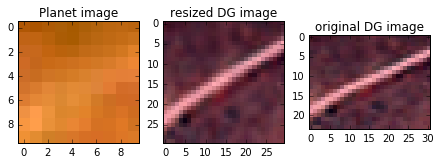

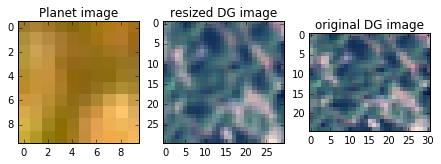

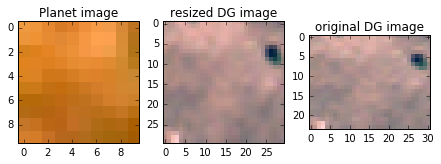

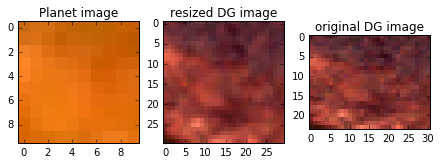

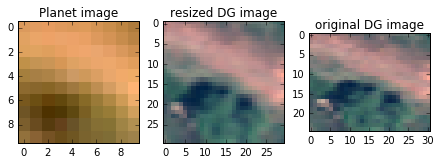

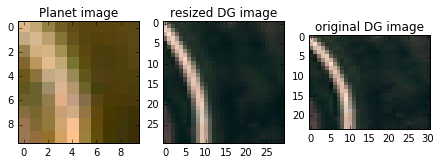

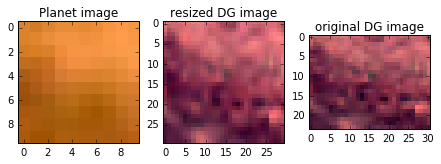

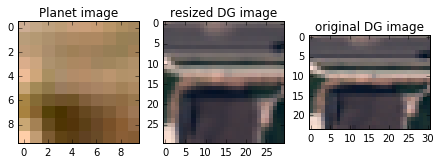

In [120]:
fsize = (10,15)
rgb = [2,1,0]
for im_ind in range(0,len(pl_files),20000):
    dg_tf, dg_bs, dg_arr = getDims(dg_files[im_ind])
    pl_tf, pl_bs, pl_arr = getDims(pl_files[im_ind])

    # 2,3,5,7 are WV2 B,G,R,NIR-1. subtract 1 for python indexing
    pl_arr.shape, dg_arr.shape
    dg_bgrn = [1,2,4,6]
    image = dg_arr[dg_bgrn,:,:]
    image.shape

    new_shape = [4,30,30]
    new_shape = pl_arr.shape[0], pl_arr.shape[1]*3, pl_arr.shape[2]*3
    #image_rescaled = rescale(image, 1.0 / 4.0, anti_aliasing=False)
    image_resized = resize(image, new_shape, preserve_range=True, mode='reflect')
    #image_downscaled = downscale_local_mean(image, (4, 3))

    
    fig = plt.figure(figsize=fsize)
    ax = fig.add_subplot(141)
    pl_plotim = np.rollaxis(pl_arr, 0, 3)
    pl_plotim = pl_plotim[:,:,rgb]
    ax.imshow(misc.bytescale(pl_plotim), interpolation = 'nearest')
    plt.title('Planet image')

    ax = fig.add_subplot(142)
    dg_rs_plotim = np.rollaxis(image_resized, 0, 3)
    dg_rs_plotim = dg_rs_plotim[:,:,rgb]
    ax.imshow(misc.bytescale(dg_rs_plotim), interpolation = 'nearest')
    plt.title('resized DG image')

    ax = fig.add_subplot(143)
    dg_plotim = np.rollaxis(image, 0, 3)
    dg_plotim = dg_plotim[:,:,rgb]
    ax.imshow(misc.bytescale(dg_plotim), interpolation = 'nearest')
    plt.title('original DG image')
    
#     ax = fig.add_subplot(144)
#     dg_plotim = np.rollaxis(image, 0, 3)
#     dg_plotim = dg_plotim[:,:,rgb]
#     ax.imshow(misc.bytescale(pl_plotim - dg_rs_plotim), interpolation = 'nearest')
#     plt.title('planet - resized DG image')
    
    plt.show()
    
   

In [101]:
len(pl_files)

140152

In [93]:
image_resized.shape


(4L, 30L, 30L)

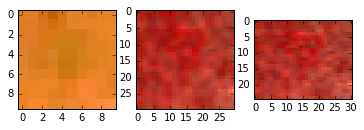

In [67]:
dg_arr.max(), image_resized.max(), image.dtype, image_resized.dtype

(2866, 2426.6049999999996, dtype('uint16'), dtype('float64'))

In [89]:
import skimage
skimage.__version__

'0.13.0'

In [ ]:
!conda update skimage